In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import style
style.use('ggplot')

In [3]:
def read_route(file_name):
    """
    :param file_name: csv file name
    :return: route data
    """
    cols = ['id']
    cols = cols + [str(i) for i in range(782)]
    print('\n-------------------')
    print('read csv')
    print('cols:', cols)
    print('cols shape:', np.shape(cols))
    data = pd.read_csv(file_name, names=cols)
    print('data shape:', data.shape)
    print('data cols:', data.columns)

    return data

In [4]:
class JudgeRegion():    
    """
    used to detect region for sid
    """
    def getPara(self, num):
        y = num % 100
        floor = int(num / 10000)
        x = int((num - floor * 10000) / 100)

        return x, y, floor

    def getWhere(self, num):
        if num == 0:
            return 'out'

        x, y, floor = self.getPara(num)

        if floor == 1:
            if x == 15 and (y == 5 or y == 15 or y == 17) or x == 0 and y == 19:
                return 'out'

            if 2 <= x < 4 and 1 <= y < 6:
                return 'hallA'

            if 4 <= x < 6 and 1 <= y < 6:
                return 'hallB'

            if 6 <= x < 8 and 1 <= y < 6:
                return 'hallC'

            if 8 <= x < 10 and 1 <= y < 6:
                return 'hallD'

            if 3 <= x < 10 and 7 <= y < 9:
                # return 'other'
                return 'poster'

            if 4 <= x < 6 and 10 <= y < 12:
                return 'toilet1'
                # return 'other'

            if 6 <= x < 10 and 10 <= y < 12:
                return 'room1'
                # return 'other'

            if 10 <= x < 12 and 10 <= y < 12:
                return 'room2'
                # return 'other'

            if 2 <= x < 12 and 15 <= y < 19:
                return 'exhibition'

            if 2 <= x < 12 and 19 <= y < 29:
                return 'mainHall'

            if 12 <= x < 14 and 2 <= y < 6:
                return 'register'
                # return 'other'

            if 14 <= x < 16 and 19 <= y < 21:
                return 'service'
                # return 'other'

            if 14 <= x < 16 and 21 <= y < 25:
                # return 'other'
                return 'room3'

            if 14 <= x < 16 and 25 <= y < 27:
                # return 'other'
                return 'room4'

            if 14 <= x < 16 and 27 <= y < 29:
                # return 'other'
                return 'toilet2'
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
            if x == 1 and 10 <= y < 12:
                # return 'Up'
                return 'elevatorUp'
                # return 'other'

            if x == 14 and 10 <= y < 12:
                # return 'Down'
                return 'elevator'
                # return 'other'

            return 'other'

        else:
            if 2 <= x < 10 and 1 <= y < 6:
                # return 'other'
                return 'diningHall'

            if 10 <= x < 12 and 1 <= y < 6:
                # return 'other'
                return 'room5'

            if 13 <= x and 0 <= y < 6:
                # return 'other'
                return 'recreationArea'

            if 4 <= x < 6 and 10 <= y < 12:
                # return 'other'
                return 'toilet3'

            if 6 <= x < 8 and 10 <= y < 12:
                # return 'other'
                return 'room6'

            if x == 1 and 10 <= y < 12:
                # return 'other'
                return 'elevatorUp'

            if x == 14 and 10 <= y < 12:
                # return 'other'
                return 'elevator'

            return 'other'

In [5]:
id_dict = []
for n in range(1, 4):
    print('\n// --------------------------------')
    print('read route ' + str(n) )
    id_dict.append({})
    cols = ['id']
    cols = cols + [str(i) for i in range(782)]
    route_data = pd.read_csv('data/route' + str(n) + '.csv', names=cols).fillna(0).astype('int32')
    print(route_data.head())

    startend = [[55, 635], [85, 720], [85, 310]]
    for j in range(1, startend[n-1][0]):
        for index, row in route_data.iterrows():
            t = route_data.iloc[index, j]
            if t != 0 and t != 11505 and t != 11515 and t != 11517 and t != 10019:
                id_dict[n - 1][route_data.iloc[index, 0]] = 1
                
    print('\n count: ', len(id_dict[n - 1].keys()))
    print(id_dict[n-1].keys())
    
    for j in range(startend[n-1][1], route_data.shape[1]):
        for index, row in route_data.iterrows():
            t = route_data.iloc[index, j]
            if t != 0 and t != 11505 and t != 11515 and t != 11517:
                id_dict[n - 1][route_data.iloc[index, 0]] = 1
                
    print('\n count: ', len(id_dict[n - 1].keys()))
    print(id_dict[n-1].keys())


// --------------------------------
read route 1
      id  0  1  2  3  4  5  6  7  8 ...   772  773  774  775  776  777  778  \
0  10001  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
1  10003  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
2  10012  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
3  10014  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
4  10015  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   

   779  780  781  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 783 columns]

 count:  47
dict_keys([11396, 15367, 10196, 16111, 15800, 11462, 12856, 13300, 11876, 10164, 11778, 18689, 14678, 17516, 18367, 12573, 14825, 13339, 18123, 13982, 19027, 18059, 14819, 15152, 15670, 16290, 10638, 15801, 19617, 12602, 10762, 14863, 15408, 11532, 19627, 16065, 11026, 11143, 17054, 11165, 11251, 13322, 16310, 13460, 13890

### 共同参与到3天的工作人员

In [6]:

total_dict = {}
for n in range(3):
    for item in id_dict[n].keys():
        total_dict[item] = id_dict[n][item]
print(len(total_dict.keys()))

cnt = 0
common_dict = []
print('1 2 3')
for item in total_dict:
    if item in id_dict[0] and  item in id_dict[1] and item in id_dict[2]:
        cnt += 1
        common_dict.append(item)
print(cnt)
print(common_dict)

common_dict = []
cnt = 0
print('1 3')
for item in total_dict:
    if item in id_dict[0] and item in id_dict[2]:
        cnt += 1
        common_dict.append(item)
print(cnt)
print(common_dict)

common_dict = []
cnt = 0
print('1 2')
for item in total_dict:
    if item in id_dict[0] and item in id_dict[1]:
        cnt += 1
        common_dict.append(item)
print(cnt)
print(common_dict)

common_dict = []
cnt = 0
print('3 2')
for item in total_dict:
    if item in id_dict[2] and item in id_dict[1]:
        cnt += 1
        common_dict.append(item)
print(cnt)

68
1 2 3
28
[15367, 10196, 16111, 11462, 13300, 11876, 10164, 11778, 18689, 17516, 18367, 12573, 14825, 13982, 19027, 14819, 15152, 15670, 16290, 15801, 12602, 15408, 11532, 19627, 16065, 17054, 11165, 11251]
1 3
38
[11396, 15367, 10196, 16111, 15800, 11462, 12856, 13300, 11876, 10164, 11778, 18689, 14678, 17516, 18367, 12573, 14825, 13982, 19027, 18059, 14819, 15152, 15670, 16290, 10638, 15801, 12602, 15408, 11532, 19627, 16065, 17054, 11165, 11251, 13322, 13460, 12805, 11619]
1 2
33
[15367, 10196, 16111, 11462, 13300, 11876, 10164, 11778, 18689, 17516, 18367, 12573, 14825, 13339, 18123, 13982, 19027, 14819, 15152, 15670, 16290, 15801, 12602, 15408, 11532, 19627, 16065, 11026, 11143, 17054, 11165, 11251, 16310]
3 2
32


### 将三天的工作人员排序

In [46]:
for i in range(3):
    print(i)
    s = list(id_dict[i].keys())
    s.sort()
    print(s)

0
[10164, 10196, 10638, 10705, 10762, 11026, 11143, 11165, 11251, 11396, 11462, 11532, 11619, 11778, 11876, 12573, 12602, 12805, 12856, 13300, 13322, 13339, 13460, 13578, 13890, 13982, 14461, 14678, 14819, 14825, 14863, 15152, 15367, 15408, 15670, 15800, 15801, 16045, 16065, 16111, 16290, 16310, 17054, 17516, 18059, 18123, 18185, 18367, 18689, 19027, 19617, 19627]
1
[10164, 10196, 10345, 11026, 11143, 11165, 11251, 11462, 11532, 11778, 11876, 12169, 12573, 12602, 13300, 13339, 13982, 14819, 14825, 14859, 15152, 15367, 15408, 15670, 15801, 16065, 16111, 16290, 16310, 16908, 17054, 17516, 18123, 18347, 18367, 18689, 19027, 19627]
2
[10164, 10196, 10345, 10638, 11165, 11251, 11396, 11462, 11476, 11532, 11619, 11778, 11876, 11991, 12169, 12573, 12602, 12805, 12856, 13300, 13322, 13460, 13982, 14678, 14819, 14825, 14859, 15062, 15152, 15367, 15408, 15670, 15800, 15801, 16065, 16111, 16290, 16615, 16817, 17054, 17401, 17516, 17704, 17773, 18059, 18246, 18347, 18367, 18689, 19027, 19479, 1951


// --------------------------------
read route 1
{'mainHall': 577, 'room5': 118, 'other': 117, 'register': 13, 'hallB': 2, 'service': 4, 'hallD': 1, 'exhibition': 12, 'room2': 3, 'room4': 1, 'hallC': 2, 'hallA': 1, 'elevatorUp': 1, 'elevator': 1}
select set:
{'mainHall': [], 'room5': [10041, 10046, 10090, 10232, 10284, 10388, 10409, 10418, 10439, 10545, 10571, 10634, 10744, 10780, 10933, 10935, 10981, 11028, 11096, 11176, 11591, 11619, 11782, 11794, 11804, 11834, 11903, 12029, 12034, 12132, 12192, 12211, 12277, 12340, 12374, 12570, 12703, 12968, 13096, 13121, 13132, 13229, 13238, 13243, 13251, 13292, 13330, 13367, 13442, 13533, 13613, 13642, 13650, 13860, 13986, 13999, 14069, 14094, 14535, 14599, 14601, 14657, 14787, 15165, 15506, 15607, 15946, 15979, 16045, 16367, 16369, 16431, 16564, 16634, 16790, 16815, 16817, 17096, 17214, 17233, 17251, 17273, 17286, 17297, 17458, 17514, 17598, 17724, 17863, 17874, 17953, 17997, 18096, 18181, 18297, 18300, 18450, 18482, 18557, 18718, 18851, 18899,

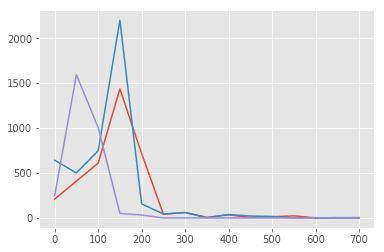

In [6]:
# 用于找字典中的最大值，以及它的键
def keywithmaxval(d):
    """ a) create a list of the dict's keys and values; 
         b) return the key with the max value"""
    v = list(d.values())
    k=list(d.keys())
    m = max(v)
    return m, k[v.index(m)]

time_thres = 240
region = JudgeRegion()
id_dict = []
for n in range(1, 4):
    print('\n// --------------------------------')
    print('read route ' + str(n) )
    id_dict.append({})
    cols = ['id']
    cols = cols + [str(i) for i in range(782)]
    route_data = pd.read_csv('data/route' + str(n) + '.csv', names=cols).fillna(0).astype('int32')
#     print(route_data.head())

    max_rec = []
    max_id = []
    max_room = []
    for index, row in route_data.iterrows():
        tmpdict = {}
        for j in range(1, route_data.shape[1]):
            t = route_data.iloc[index, j]
            if t != 0 and t != 11505 and t != 11515 and t != 11517 and t != 10019:
                temp = region.getWhere(t)
                if temp not in tmpdict.keys():
                    tmpdict[temp] = 0
                tmpdict[temp] += 1
        m, k = keywithmaxval(tmpdict)
        max_rec.append(m)
        max_room.append(k)
        max_id.append(route_data.iloc[index, 0])
        # k 是所在房间，m 是呆的时间
    
    arr = np.zeros(15)
    id_rec = []
    brush = {}
    selectSet = {}
    thres = [200, 200, 150]
    #brush = {'room5':0, 'room6':0, 'exhibition':0, 'elevatorUp':0, 'elevator':0, 'other':0, 'register':0, 'service':0, 'mainHall':0, 
    #        'hallB':0, 'hallD':0, 'room2':0, 'room4':0, 'hallC':0, 'hallA':0}
    for index, m in enumerate(max_rec):
        arr[m//50] += 1
        if m > thres[n - 1]:
            temp = max_room[index]
            id_rec.append(temp)
            if temp not in brush.keys():
                brush[temp] = 0
                selectSet[temp] = []
            brush[temp] += 1
            if temp != 'mainHall' and temp != 'other':
                selectSet[temp].append(max_id[index])
    x = np.linspace(0, 700, 15)
    plt.plot(x, arr)
    
    print(brush)
    print('select set:')
    print(selectSet)

In [53]:
print(max(max_rec), min(max_rec))

611 19


In [85]:
arr = np.zeros(15)
id_rec = []
brush = {}
#brush = {'room5':0, 'room6':0, 'exhibition':0, 'elevatorUp':0, 'elevator':0, 'other':0, 'register':0, 'service':0, 'mainHall':0, 
#        'hallB':0, 'hallD':0, 'room2':0, 'room4':0, 'hallC':0, 'hallA':0}
for index, m in enumerate(max_rec):
    arr[m//50] += 1
    if m > 50:
        temp = max_room[index]
        id_rec.append(temp)
        if temp not in brush.keys():
            brush[temp] = 0
        brush[temp] += 1
x = np.linspace(0, 700, 15)
plt.plot(x, arr)
# print(arr)
# print(id_rec)
print(brush)

IndexError: index 14 is out of bounds for axis 0 with size 13

In [14]:
room6_all = []
day1 = pd.read_csv('data/day3.csv')
region = JudgeRegion()
room6_set = {}
for index, row in day1.iterrows():
    s = region.getWhere(row['sid'])
    if (s == 'room6'):
        room6_set[row['id']] = 1
print(len(room6_set.keys()))
room6_all.append(room6_set.keys())

74


In [24]:
for i in range(3):
    
    s = list(room6_all[i])
    s.sort()
#     print(sort(room6_all)
    print(s)

[10164, 10196, 10309, 10345, 10638, 10705, 10762, 11026, 11143, 11165, 11251, 11383, 11396, 11462, 11476, 11496, 11532, 11619, 11778, 11876, 11991, 12169, 12206, 12426, 12573, 12602, 12611, 12805, 12856, 13300, 13322, 13339, 13460, 13485, 13578, 13890, 13982, 14255, 14678, 14819, 14825, 14859, 14863, 15095, 15152, 15367, 15387, 15408, 15670, 15800, 15801, 16045, 16065, 16111, 16290, 16310, 16615, 17054, 17516, 17576, 17704, 17773, 18059, 18123, 18185, 18347, 18367, 18574, 18689, 19027, 19479, 19617, 19627, 19682]
[10164, 10196, 10309, 10345, 10638, 10705, 10762, 11026, 11143, 11165, 11251, 11383, 11396, 11462, 11476, 11496, 11532, 11619, 11778, 11876, 11991, 12169, 12206, 12426, 12573, 12602, 12611, 12805, 12856, 13300, 13322, 13339, 13460, 13485, 13578, 13890, 13982, 14255, 14678, 14819, 14825, 14859, 14863, 15095, 15152, 15367, 15387, 15408, 15670, 15800, 15801, 16045, 16065, 16111, 16290, 16310, 16615, 17054, 17516, 17576, 17704, 17773, 18059, 18123, 18185, 18347, 18367, 18574, 1868

In [25]:
staff_count = {}
day = [[10164, 10196, 10309, 10345, 10638, 10705, 10762, 11026, 11143, 11165, 11251, 11383, 11396, 11462, 11476, 11496, 11532, 11619, 11778, 11876, 11991, 12169, 12206, 12426, 12573, 12602, 12611, 12805, 12856, 13300, 13322, 13339, 13460, 13485, 13578, 13890, 13982, 14255, 14678, 14819, 14825, 14859, 14863, 15095, 15152, 15367, 15387, 15408, 15670, 15800, 15801, 16045, 16065, 16111, 16290, 16310, 16615, 17054, 17516, 17576, 17704, 17773, 18059, 18123, 18185, 18347, 18367, 18574, 18689, 19027, 19479, 19617, 19627, 19682], 
        [10164, 10196, 10309, 10345, 10638, 10705, 10762, 11026, 11143, 11165, 11251, 11383, 11396, 11462, 11476, 11496, 11532, 11619, 11778, 11876, 11991, 12169, 12206, 12426, 12573, 12602, 12611, 12805, 12856, 13300, 13322, 13339, 13460, 13485, 13578, 13890, 13982, 14255, 14678, 14819, 14825, 14859, 14863, 15095, 15152, 15367, 15387, 15408, 15670, 15800, 15801, 16045, 16065, 16111, 16290, 16310, 16615, 17054, 17516, 17576, 17704, 17773, 18059, 18123, 18185, 18347, 18367, 18574, 18689, 19027, 19479, 19617, 19627, 19682],
       [10164, 10196, 10309, 10345, 10638, 10705, 10762, 11026, 11143, 11165, 11251, 11383, 11396, 11462, 11476, 11496, 11532, 11619, 11778, 11876, 11991, 12169, 12206, 12426, 12573, 12602, 12611, 12805, 12856, 13300, 13322, 13339, 13460, 13485, 13578, 13890, 13982, 14255, 14678, 14819, 14825, 14859, 14863, 15095, 15152, 15367, 15387, 15408, 15670, 15800, 15801, 16045, 16065, 16111, 16290, 16310, 16615, 17054, 17516, 17576, 17704, 17773, 18059, 18123, 18185, 18347, 18367, 18574, 18689, 19027, 19479, 19617, 19627, 19682]]
for i in range(3):
    for item in day[i]:
        s = str(item)
        if s not in staff_count.keys():
            staff_count[s] = 0
        staff_count[s] += 1

In [26]:
import json
with open('staff_count_room6.json', 'w') as json_file:
    json.dump(staff_count, json_file)

In [34]:
with open('staff_countHALLABCD.json') as json_file: 
    a = json.load(json_file)
    for item in a.keys():
        if item not in r:
            r[item] = 0
        r[item] += a[item]
r

{'11396': 5,
 '15367': 8,
 '10196': 8,
 '16111': 6,
 '15800': 8,
 '11462': 6,
 '12856': 5,
 '13300': 7,
 '11876': 8,
 '10164': 9,
 '11778': 6,
 '18689': 6,
 '14678': 6,
 '17516': 6,
 '18367': 8,
 '12573': 6,
 '14825': 8,
 '13339': 5,
 '18123': 6,
 '13982': 6,
 '19027': 6,
 '18059': 5,
 '14819': 9,
 '15152': 8,
 '15670': 9,
 '16290': 6,
 '10638': 8,
 '15801': 9,
 '19617': 6,
 '12602': 9,
 '10762': 6,
 '14863': 6,
 '15408': 7,
 '11532': 7,
 '19627': 6,
 '16065': 6,
 '11026': 7,
 '11143': 5,
 '17054': 8,
 '11165': 6,
 '11251': 8,
 '13322': 8,
 '16310': 8,
 '13460': 8,
 '13890': 6,
 '14461': 1,
 '12805': 5,
 '10705': 4,
 '11619': 8,
 '13578': 7,
 '16045': 7,
 '18185': 4,
 '18347': 6,
 '14859': 7,
 '10345': 7,
 '16908': 1,
 '12169': 5,
 '15062': 1,
 '17401': 1,
 '11476': 4,
 '16817': 3,
 '11991': 4,
 '16615': 4,
 '17704': 4,
 '17773': 4,
 '18246': 1,
 '19479': 4,
 '19514': 1,
 '13374': 2,
 '13939': 2,
 '14349': 2,
 '14882': 2,
 '16205': 2,
 '16807': 2,
 '17536': 2,
 '17865': 2,
 '18137': 2,

In [35]:
print(len(r))
with open('staff_count_all.json', 'w') as json_file:
    json.dump(r, json_file)

293


## 找商人！！！！！！

In [19]:
import pandas as pd
stay_front_dict = []
stay_front_list = []
for i in range(1, 4):

    route = pd.read_csv('data/route{}.csv'.format(i))
    cnt_all_inoneday = {}
    cnt_all_inoneday_list = []
    for index, row in route.iterrows():
        cnt_in_oneday = 0
        max_cnt = 0
        for j in range(1, route.shape[1]):
            if route.iloc[index, j] == 10222 or \
                    route.iloc[index, j] == 10223 or \
                    route.iloc[index, j] == 10224:
                cnt_in_oneday += 1
            else:
                if cnt_in_oneday != 0:
                    max_cnt = max(max_cnt, cnt_in_oneday)
                cnt_in_oneday = 0
        cnt_all_inoneday[route.iloc[index, 0]] = max_cnt
        cnt_all_inoneday_list.append(max_cnt)
    stay_front_list.append(cnt_all_inoneday_list)
    stay_front_dict.append(cnt_all_inoneday)
    


In [8]:
import pandas as pd
stay_front_dict = []

for i in range(1, 4):

    route = pd.read_csv('data/route{}.csv'.format(i))
    cnt_all_inoneday = []
    for index, row in route.iterrows():
        cnt_in_oneday = 0
        for j in range(1, route.shape[1]):
            if route.iloc[index, j] == 10222 or \
                    route.iloc[index, j] == 10223 or \
                    route.iloc[index, j] == 10224:
                cnt_in_oneday += 1
        cnt_all_inoneday.append({route.iloc[index, 0]: cnt_in_oneday})
    stay_front_dict.append(cnt_all_inoneday)
            

In [12]:
for i in range(3):
    a = stay_front_dict[i]
    for item in a:
        b = list(item.values())
        if b[0] > 40:
            print(item.keys())
    

dict_keys([11662])
dict_keys([15626])
dict_keys([16975])
dict_keys([18364])
dict_keys([18608])
dict_keys([19145])
dict_keys([12293])
dict_keys([14582])
dict_keys([16908])
dict_keys([17868])
dict_keys([12024])
dict_keys([14338])


In [2]:
print(len(stay_front_row))

10925


In [28]:
stay_front_row_sort = sorted(stay_front_list)
all = []
for item in stay_front_list:
    for it2 in item:
        all.append(it2)
print(len(all))

t = all

10925


In [41]:
dict_all = {}
for wrap in range(3):
    a = stay_front_dict[wrap]
    for key, value in a.items():
        if key not in dict_all.keys():
            dict_all[key] = a[key] / 19 * 0.8
        else:
            dict_all[key] = max(a[key] / 19 * 0.8, dict_all[key])
import collections


od = collections.OrderedDict(sorted(dict_all.items()))
olist = [0, 0]
for key, value in od.items():
    olist.append(value)
print(len(olist))

5256


In [42]:
feature_data = pd.read_csv('feature.csv')
print(feature_data.shape[0])
feature_data.insert(feature_data.shape[1], 'StageTime', olist, True)
feature_data.to_csv('feature_0607.csv')

5256


In [4]:
import pandas as pd

day_data = pd.read_csv('data/day1.csv')
id_rec = {}
for index, row in day_data.iterrows():
    if row['time'] <= 28800  and (row['sid'] == 10515 or row['sid'] == 10815 or row['sid'] == 11115 or
        row['sid'] == 10518 or row['sid'] == 10818 or row['sid'] == 11118):
        id_rec[row['id']] = 1
        print(row['id'])

        
        
    

KeyboardInterrupt: 